In [1]:
import sys
import pandas
import numpy
import matplotlib
import seaborn
import scipy
import sklearn

# PRINT VERSIONS
print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas: 0.25.1
Numpy: 1.17.2
Matplotlib: 3.1.1
Seaborn: 0.9.0
Scipy: 1.3.1
Sklearn: 0.21.3


In [2]:
#import the neccessary package
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max.columns', None)

In [3]:
# load dataSet
data = pd.read_csv('creditcard.csv')

In [4]:
# view the data
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# EXPLORE THE DATA

In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# lets check if there are any null values
features = [features for features in data.columns if data[features].isnull().sum() > 1]
print(features)
print('no null values or missing values, thus we can go straight to other explorations')

[]
no null values or missing values, thus we can go straight to other explorations


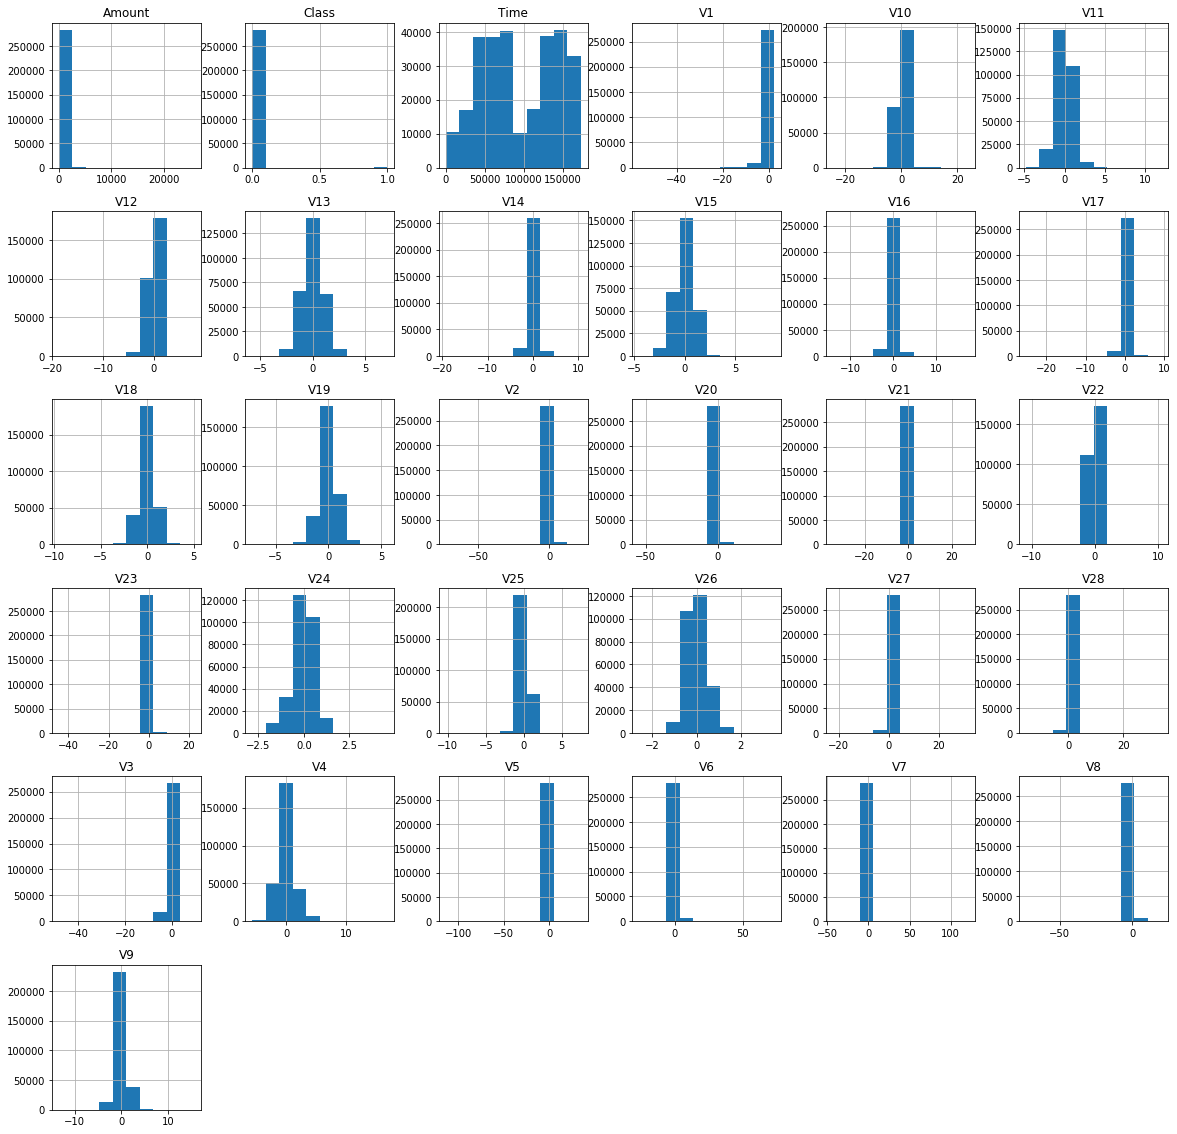

In [7]:
# lets see the relationship between all the variables
data.hist(figsize=(20,20))
plt.show();

<p>From the histogram above we can observe that the fradulent cases are so low compared to regular transaction. All the graph seem to be normally distributed except for time,amount and class. This dataset is a highly unbalanced dataset </p>

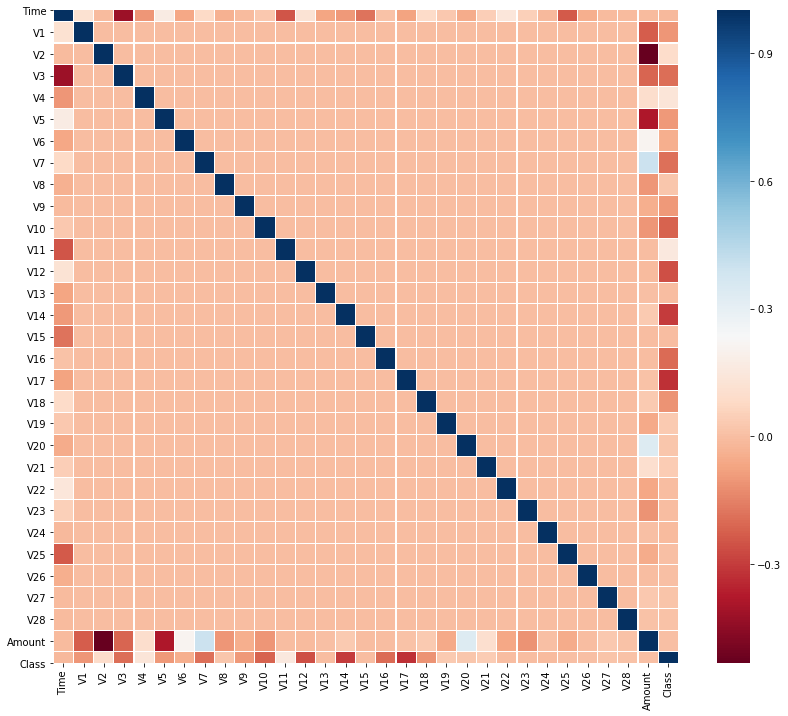

In [8]:
# lets see the correlation between the dataset.
corr = data.corr()
#plot a heatmap
ax, fig = plt.subplots(figsize=(14,12))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu")

In [9]:
corr['Class'].sort_values(ascending=False) 

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

<p> We observe that there seem to be no correlation between the class variable and the other components </p>

In [10]:
# lets dive deeper. Observe the time the the fraudulent and regular transaction occur mostly
# BTW, the fradulent transaction is Class int 1 and the Regular transaction is Class int 0
# contruct an histogram to view the disparity 
fraud_time_occurance = data.loc[data['Class'] == 1, ['Time']]
regular_time_occurance = data.loc[data['Class'] == 0, ['Time']]

fraud_time_occurance = np.asarray(fraud_time_occurance['Time'])
regular_time_occurance = np.asarray(regular_time_occurance['Time'])


Text(0.5, 0, 'Time')

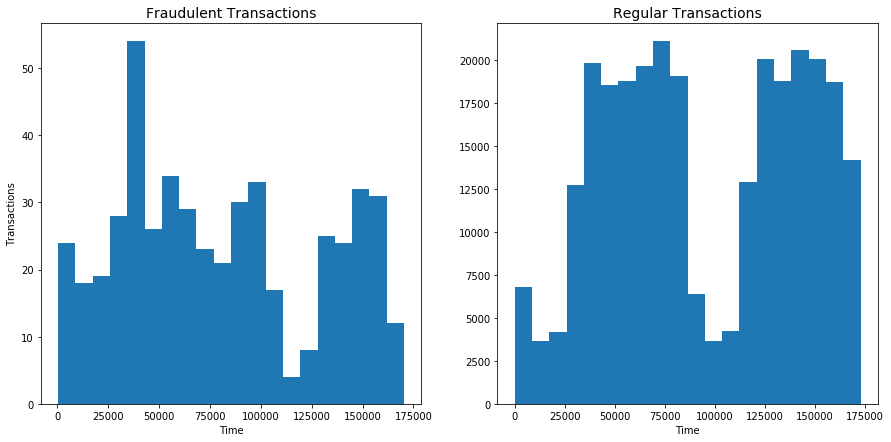

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

ax[0].hist(fraud_time_occurance, bins=20)
ax[0].set_title('Fraudulent Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')
ax[0].set_xlabel('Time')

ax[1].hist(regular_time_occurance, bins=20)
ax[1].set_title('Regular Transactions', fontsize=14)
ax[1].set_xlabel('Time')

<p>Fromt the Most fraudulent transactions seems to occur mostly around 25000 anf 100000 seconds. This correlate with the the timing in the histogram for regular transaction </p>

# SOME STATISTICS

In [12]:
# Percentage of the fraudulent transaction in comparison to regular transaction
fraud = data.loc[data.Class == 1, ['Class']]
regular = data.loc[data.Class == 0, ['Class']]

print('the percentage of fraud is', np.round((len(fraud)/len(data))*100, 4), '%')
print('the percentage of regular transaction is', np.round((len(regular)/len(data))*100, 4), '%')

the percentage of fraud is 0.1727 %
the percentage of regular transaction is 99.8273 %


# PREPROCESSING- Feature Scaling

In [13]:
# importing standardScaler from scikit learn
# converting Time and amount into a normal distribution where the mean is 1 and the Std is 0
# Other variables don't need to be converted because all the same unit of measurement

from sklearn.preprocessing import StandardScaler

In [14]:
dataset = data.copy()

In [15]:
scaler = StandardScaler()

In [16]:
# create a new column
dataset['Amount_std'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset['Time_std'] = scaler.fit_transform(dataset['Time'].values.reshape(-1, 1))

In [17]:
# drop the amount and time column
dataset.drop(columns=['Amount', 'Time'], axis=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_std,Time_std
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151,1.641931
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117,1.641952
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839,1.641974
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249,1.641974


In [18]:
# preparing the model. 
# split into trainiing and testing dataSets
# import train_test_split from scikit learn
from sklearn.model_selection import train_test_split

In [19]:
X = dataset.drop(columns=['Class'], axis=1)
y = dataset['Class']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [61]:
# We have a very imbalanced Class.
# We will use SMOTE from imblern to help obtain a new dataSet with a balanced data
from imblearn.over_sampling import SMOTE

In [62]:
from collections import Counter #

In [63]:
# Ceate a new dataset from train
oversampler = SMOTE(random_state=42)
X_trainSmote, Y_trainSmote = oversampler.fit_resample(X_train, Y_train)

In [64]:
# crosscheck if the class are now equal
counter = Counter(Y_train)
counter_sm = Counter(Y_trainSmote)
print('Total number before {}'.format(counter))
print('Total number After {}'.format(counter_sm ))

Total number before Counter({0: 227451, 1: 394})
Total number After Counter({0: 227451, 1: 227451})


In [65]:
# importing random forest to train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, precision_score, recall_score 

In [66]:
clf = RandomForestClassifier()

In [67]:
clf.fit(X_trainSmote,  Y_trainSmote)

/Users/kingmichael/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
# perform predictions on test set
actual_values=Y_test
predictions=clf.predict(X_test)

In [69]:
# compare the TP, FP, TN, FN
print(confusion_matrix(actual_values, predictions))
print(accuracy_score(actual_values, predictions))
print(classification_report(actual_values, predictions))
print(precision_score(actual_values, predictions))
print(recall_score(actual_values, predictions))

[[56852    12]
 [   16    82]]
0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

0.8723404255319149
0.8367346938775511


In [30]:
# lets go deeper by plotting the ROC, AUC curve
# get the auc-roc score
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
# getting the probability so as to construct a ROC-AUC curve to get the best threshold value
y_predProb = clf.predict_proba(X_train)
y_prediction = clf.predict_proba(X_test)

In [53]:
print('RF train roc-auc: {}'.format(roc_auc_score(Y_train, y_predProb[:,1])))

RF train roc-auc: 1.0


In [54]:
print('RF test roc-auc: {}'.format(roc_auc_score(Y_test, y_prediction[:,1])))

RF test roc-auc: 0.9475490393118419


In [55]:
pred = []
for i in y_prediction[:,1]:
    pred.append(i)

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual_values, pred)

In [57]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

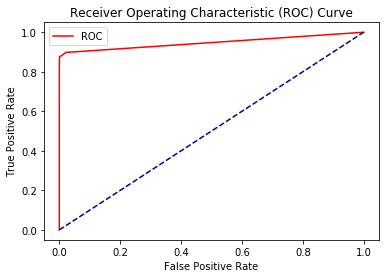

In [58]:
plot_roc_curve(false_positive_rate, true_positive_rate)